In [243]:
# Titanic Survival Prediction In this notebook , 
# we will explore the titanic , 
#clean it ,build models,and predict survival

In [244]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [245]:
df= pd.read_csv(r"d:\New folder\data science-project\New folder\data set\archive (2)\archive (5)\train.csv")
print("Shape:",df.shape)
print(df.head())
# Dataset overview -let's look at the 1st 5 row of data


Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top  

<Axes: xlabel='Survived', ylabel='count'>

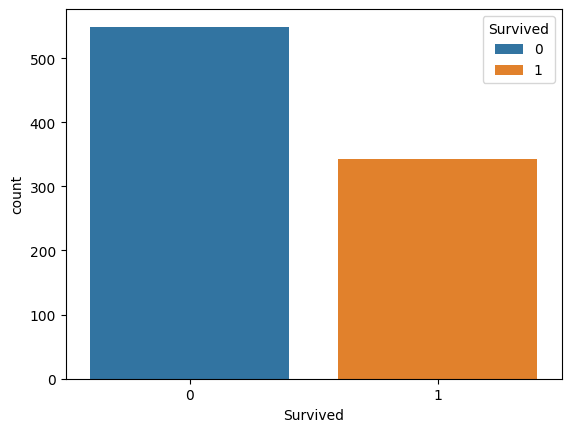

In [246]:
print(df.info())
print(df.describe(include="all"))
print("Missing value:",df.isnull().sum())
sns.countplot(x="Survived",data=df,hue="Survived")
### Insights 
# -check data types and missing values 
# - survival countplot

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64


Text(0.5, 1.0, 'Survived by Sex')

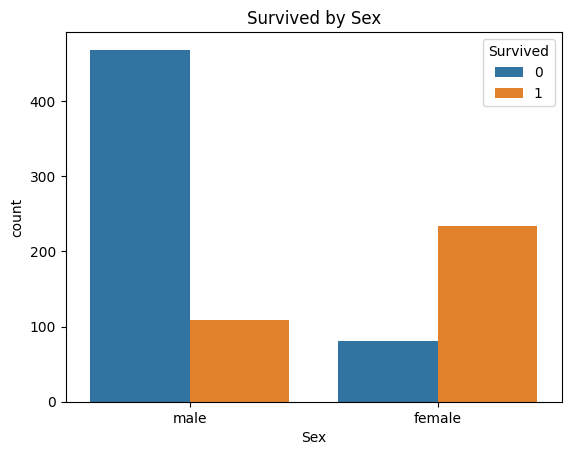

In [247]:
print(df.groupby("Sex")["Survived"].value_counts())
print(df["Sex"].value_counts())
sns.countplot(x="Sex",hue="Survived",data=df)
plt.title("Survived by Sex")
#-countplot of male and female at crave
#most female Survived ,while most males did not


Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

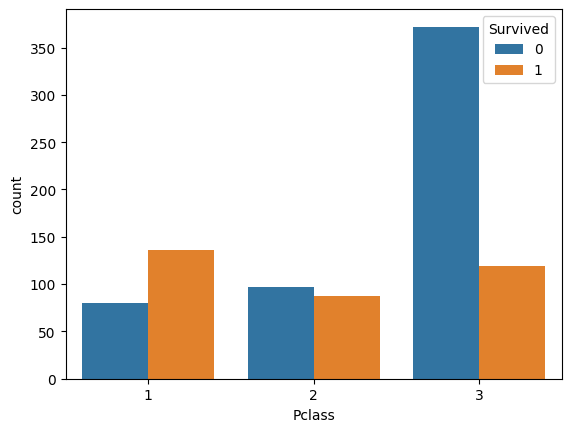

In [248]:
print(df["Pclass"].value_counts())
print(df.groupby("Pclass")["Survived"].mean())

sns.countplot(x="Pclass",hue="Survived",data=df)
# 1st class passengers had the highest suevival rate ,2nd class medium 3rd class are lowest

Text(0, 0.5, 'Count')

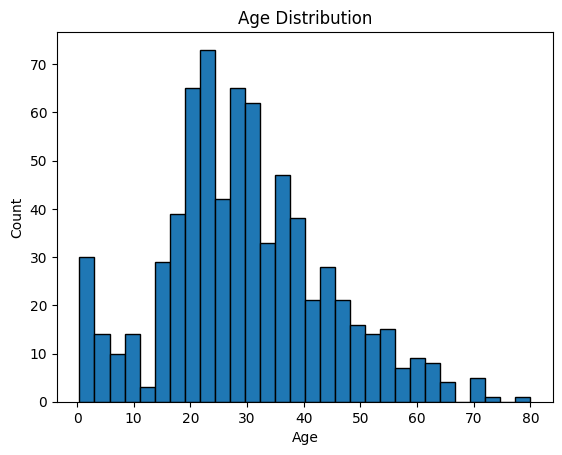

In [249]:
plt.hist(df["Age"].dropna(),bins=30,edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
# young people are more in sheep child &old are less

Text(0.5, 1.0, 'Age vs Survived')

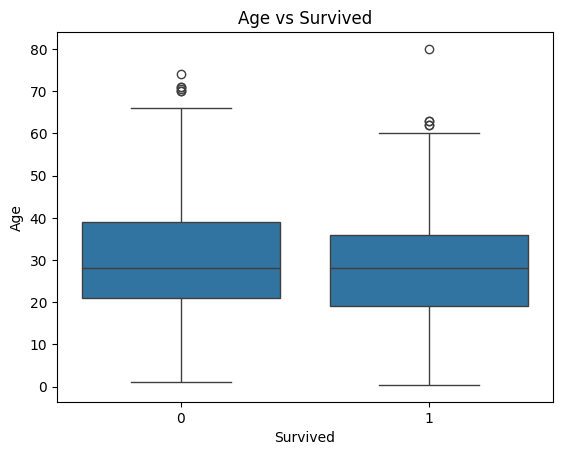

In [250]:
sns.boxplot(x="Survived",y="Age",data=df)
plt.title("Age vs Survived")
# younger passanger had better chances of survival then older passengers


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<Axes: xlabel='FamilySize', ylabel='count'>

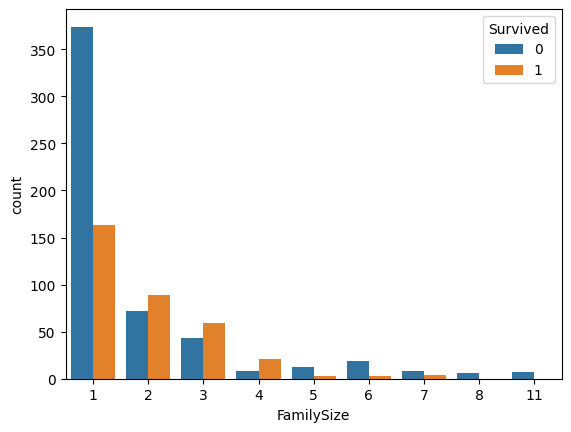

In [ ]:
print(df.columns)
df["FamilySize"]= df["SibSp"]+df["Parch"]+1
sns.countplot(x="FamilySize",hue="Survived",data=df)
#less family member type of family high chances of survived  than large number of family member or alone also

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


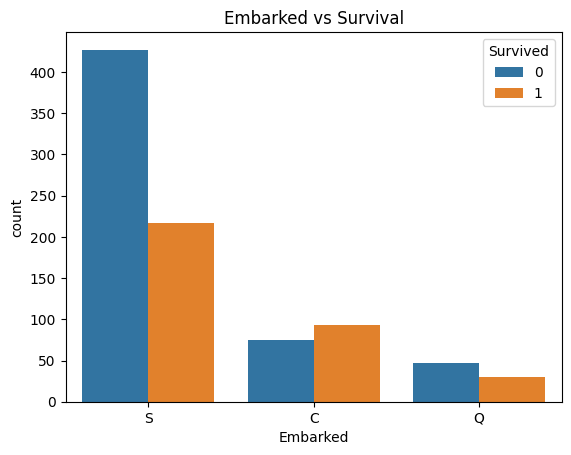

In [252]:
sns.countplot(x="Embarked",hue="Survived",data=df)
plt.title("Embarked vs Survival")
print(df.groupby("Embarked")["Survived"].mean())
#c group chances of surived are greater then other
# s group chances of dead are too high

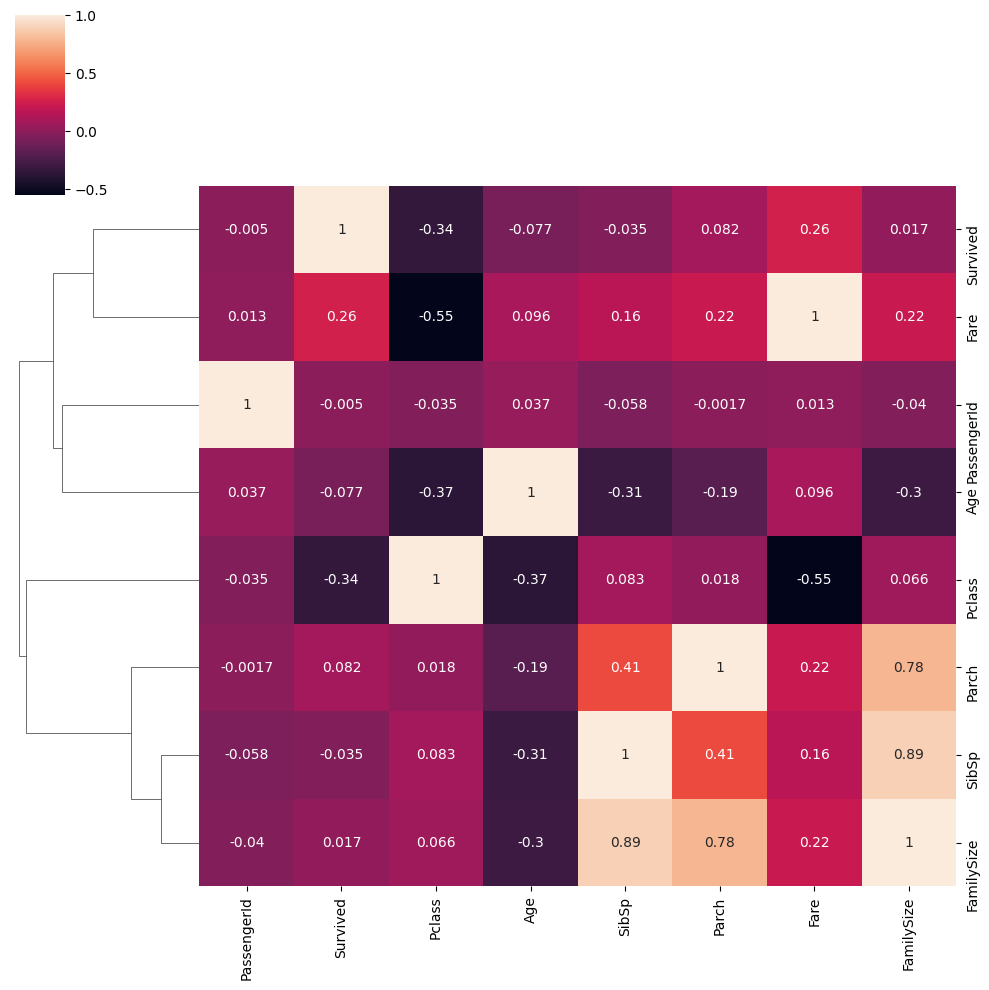

In [253]:
cor = df.corr(numeric_only=True)
sns.clustermap(cor,annot=True,col_cluster=False)
#Relation between each columns

<Axes: xlabel='Title', ylabel='count'>

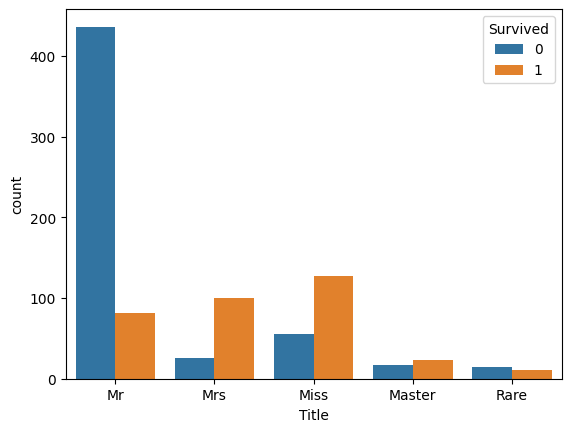

In [254]:
df["isAlone"]=0
df.loc[df["FamilySize"]==1,"isAlone"]=1
df["Title"]=df["Name"].str.extract(r"([A-Za-z]+)\.",expand=False)
df["Title"]=df["Title"].replace(["Male",'ms'],'Miss')
df["Title"]=df["Title"].replace(["Mme"],"Mrs")
rare_titles = df["Title"].value_counts()[df["Title"].value_counts()<10].index
df["Title"]= df["Title"].replace(rare_titles,"Rare")
sns.countplot(x="Title",data=df,hue="Survived")

In [255]:
### Insights from the Titanic Ddatasets
# 1. The datasets contains **891 passangers**, with information Such as age,Gender,ticket class,and survival status
# 2. Around **38% passanger  survived  ,while **62% did not survived** ,
# showing that survival chances were overall low
# 3. ** Gender play a key role** - female had a much higher survival rate compare to the male ,
# which reflect the women & children first recuse policy
# 4. ** passanger class also influenced survival 
# people in 1st class survived more often than those in 2nd and 3rd class ,
#showing that socio-economic status impacted survival
# 5. **age distribution ** 
# shows many passanger were young adults,
# but **children  had better chances of survival **compare to older adult
# 6. *family member count also impact survival - whose family member are less their family chances of survived are high 
# and who travel alone ,and having big family they have low chances of survived 
# 7. somewhere Proffesion of passanger also depend good

# overall , survival was not random - it depend on **gender ,passenger class,family count,proffesion and age group predictors for machine learning models.

In [256]:
#Data cleaning 
df["Age"]= df["Age"].fillna(df["Age"].median())
df.dropna(subset=["Embarked"],inplace=True)
df.drop(columns="Cabin",inplace=True)



In [257]:

# encoding catagorical veriables
df=pd.get_dummies(df,columns=["Embarked"],drop_first=True)
df=pd.get_dummies(df,columns=["Title"],drop_first=True)
la=LabelEncoder()
df["Sex"]= la.fit_transform(df["Sex"])
df=df.drop(columns=["PassengerId","Name","Ticket"])



In [258]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


**Logistic Reggression:Accuracy = 0.8146
 
Logistic Reggression:- clasification report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.74      0.80      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178

-------------------------------------
**Decision Tree:Accuracy = 0.7472
 
Decision Tree:- clasification report
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       109
           1       0.65      0.77      0.70        69

    accuracy                           0.75       178
   macro avg       0.74      0.75      0.74       178
weighted avg       0.76      0.75      0.75       178

-------------------------------------
**KNN:Accuracy = 0.6966
 
KNN:- clasification report
              precision    recall  f1-score   support

  

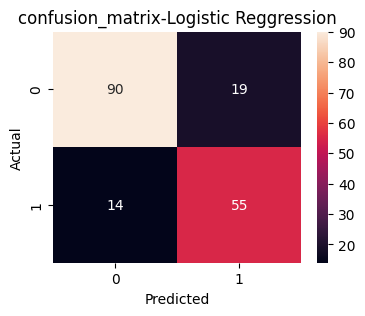

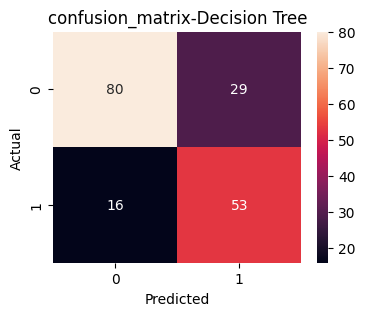

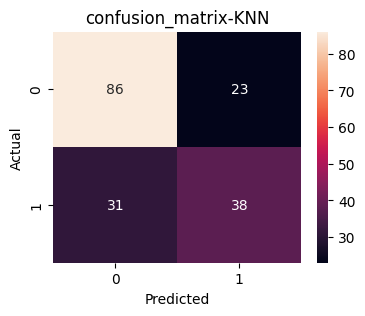

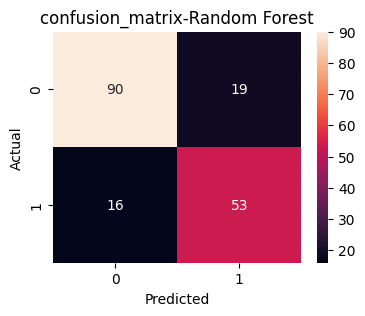

In [259]:
#Model traning
models={
    "Logistic Reggression":LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(n_estimators=100,max_depth=5,random_state=45)
}
#check accuracy
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    print(f"**{name}:Accuracy = {acc:.4f}")
    print(" ")
    cr=classification_report(y_test,y_pred)
    print(f"{name}:- clasification report")
    print(cr)
    print("-------------------------------------")
    cm=confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(4,3))

    sns.heatmap(cm,annot=True)
    plt.title(f"confusion_matrix-{name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")



In [260]:
for name,model in models.items():
    scores=cross_val_score(model,x,y,cv=5)
    print(f"{name} CV Accuracy {scores.mean():.4f}(+/- {scores.std():.4f})")

Logistic Reggression CV Accuracy 0.8189(+/- 0.0183)
Decision Tree CV Accuracy 0.7717(+/- 0.0179)
KNN CV Accuracy 0.7120(+/- 0.0290)
Random Forest CV Accuracy 0.8290(+/- 0.0171)


In [261]:
#In this project, we analyzed the Titanic dataset to identify the key factors influencing passenger survival. 
# Through data cleaning and exploratory data analysis (EDA), we observed that gender, passenger class, and
#  age were among the strongest predictors of survival. For example, females had a significantly higher survival rate 
# compared to males, and passengers from higher classes (Pclass 1) were more likely to survive than those from lower classes.
#After preprocessing (handling missing values, encoding categorical variables, and scaling where required), 
# we applied multiple machine learning models including Logistic Regression, KNN, Decision Tree, and Random Forest.
#  Among them, Logistic Regression and Random Forest achieved the most stable and consistent results,
#  with cross-validation accuracy around 82%, while Random Forest provided the best performance in test evaluation.
#The confusion matrices and classification reports further highlighted that the models performed well in identifying 
# survivors (class 1), although some misclassifications occurred, particularly with male passengers.
# Hyperparameter tuning slightly improved the accuracy, showing the importance of model optimization.
#also try for higher accuracy extracting titles from names or family size from (SibSp/Parch) 

#Final Conclusion: The project demonstrates how EDA combined with classification models can provide meaningful insights into 
# survival prediction. With proper preprocessing, Logistic Regression and Random Forest can be considered strong baseline models f
# or this dataset. Future improvements may include feature engineering.